#Рубежный контроль №1
**Тема: Технологии разведочного анализа и обработки данных.**

**Вариант №5**

*Задача №1.*

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

*Дополнительные требования по группам:*

Для студентов групп ИУ5-63Б, ИУ5Ц-83Б - для произвольной колонки данных построить график "Ящик с усами (boxplot)".


## 1) Текстовое описание набора данных:
В качестве набора данных мы будем использовать набор данных:
"Heart Disease Dataset."
(https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

**Файл содержит следующие колонки:**

1. Возраст
2. Пол
3. Тип боли в груди
4. Кровяное давление в состоянии покоя 
5. Сывороточный холестерин 
6. Уровень сахара в крови натощак
7. Результаты электрокардиографии в состоянии покоя
8. Достигнутая максимальная частота сердечных сокращений
9. Стенокардия, вызванная физической нагрузкой
10. Депрессия
11. Наклон пикового сегмента ST упражнения
12. Количество крупных сосудов (0-3), окрашенных флуороскопией
13. Имена и номера социального страхования пациентов

# Импорт библиотек:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных:

Загрузим файлы датасета в помощью библиотеки Pandas. 

In [3]:
data = pd.read_csv('/content/heart.csv', sep=",")

**Первые 5 строк датасета:**

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Размер датасета:**

In [ ]:
data.shape

(1025, 14)

**Список колонок с типами данных:**

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Подготовка данных к анализу:
**Проверим наличие пустых значений. В выбранном датасете отсутствуют пустые значения.**

In [ ]:
for col in data.columns:
  
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0


Целевым признаком текущего датасета является столбец "target".

Определим уникальные значения для целевого признака:

In [ ]:
data['target'].unique()

array([0, 1, 2, 3])

Целевой признак является бинарным и содержит только значения 0 и 1.

**При помощи pandas построим корреляционную матрицу:**

In [ ]:
corr = data.corr()
print(corr)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

 Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами:

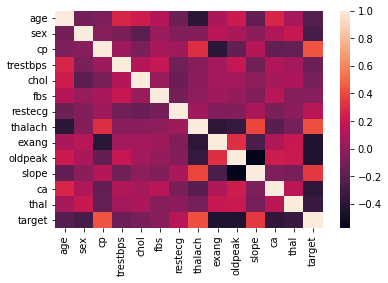

In [ ]:
sns.heatmap(data.corr())

На основе корреляционной матрицы можно сделать следующие выводы:


*   Целевой признак наиболее сильно коррелирует с типом боли в груди(0.43) и с максимальной частотой сердечных сокращений(0.42).Эти признаки стоит обязательно оставить в модели.
*   Целевой признак совсем не коррелирует с возрастом (-0.22), полом(-0.27), кровяным давлением(-0.14) и с результатом электрокардиографии в состоянии покоя(-0.43). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.





#Дополнительное задание по группам.
Для колонки "age" построен график "Ящик с усами (boxplot)":

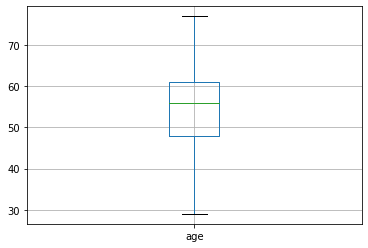

In [4]:
data.boxplot(column='age')